# Project: Classification of Stars

![Hertzsprung-Russell Diagram](hr_diagram.jpg)

This project aims to classify stars based on their temperature and luminosity. The Hertzsprung-Russell Diagram above visually represents this classification, showing the relationship between a star's temperature and its luminosity.



# Star Classification using Neural Networks

+ Project Description

In this project, I developed a neural network model to classify stars. The model was trained on the extended_training.csv dataset and tested with the unseen_test.csv dataset. The goal is to accurately classify stars based on their various physical features and evaluate the model's performance.

Throughout the project, the changes in the loss and accuracy values during the model's training were analyzed. Additionally, the model's performance on unseen data was assessed, and the potential additional features that could improve classification accuracy were considered.

This study demonstrates how deep and multi-layered neural network models handle complex data and highlights the suitability of machine learning for such problems.

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
# Matplotlib ayarları (Latex ile)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

In [3]:
extended_df = pd.read_csv('./data/extended_training.csv')

# EDA

In [4]:
extended_df.head()

,x,y,category
0,-1.716,1.172,0
1,-1.588,0.772,1
2,-0.504,-0.112,1
3,-1.324,0.332,1
4,0.920,-0.332,0


In [5]:
extended_df.shape

(10000, 3)

In [6]:
extended_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         10000 non-null  float64
 1   y         10000 non-null  float64
 2   category  10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


<Axes: >

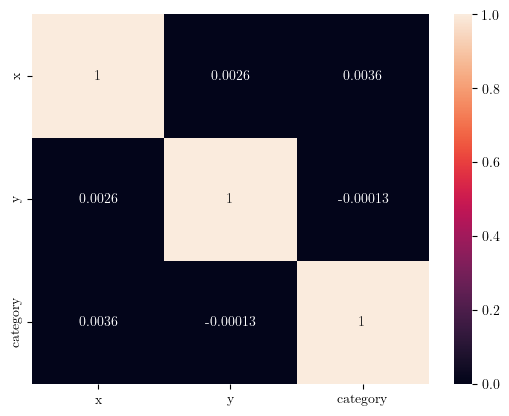

In [7]:
sns.heatmap(extended_df.corr(numeric_only=True),annot=True)

In [8]:
extended_df.describe()

,x,y,category
count,10000.000000,10000.000000,10000.00000
mean,0.002403,-0.006618,0.50590
std,1.158541,1.158847,0.49999
min,-2.000000,-2.000000,0.00000
25%,-1.004000,-1.012000,0.00000
50%,0.000000,-0.024000,1.00000
75%,1.012000,1.016000,1.00000
max,1.996000,1.996000,1.00000


In [9]:
extended_df.isnull().sum()

x           0
y           0
category    0
dtype: int64

In [10]:
coords_extended = extended_df.drop('category', axis=1)
labels_extended = extended_df['category']

In [11]:
coords_extended

,x,y
0,-1.716,1.172
1,-1.588,0.772
2,-0.504,-0.112
3,-1.324,0.332
4,0.920,-0.332
...,...,...
9995,1.456,0.832
9996,0.164,0.844
9997,1.132,1.400
9998,0.172,-1.596


In [12]:
labels_extended

0       0
1       1
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: category, Length: 10000, dtype: int64

#### Model Retraining with Extended Data and Visualization of Results

In this section, the model was retrained using the `extended_training.csv` dataset. The model's performance was monitored over 15 epochs. During the training process, the loss function and accuracy metrics were recorded and these metrics were visualized.

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5878 - binary_accuracy: 0.5878 - loss: 0.6723
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7551 - binary_accuracy: 0.7551 - loss: 0.5167
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8088 - binary_accuracy: 0.8088 - loss: 0.4315
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - binary_accuracy: 0.8333 - loss: 0.3882
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - binary_accuracy: 0.8567 - loss: 0.3325
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - binary_accuracy: 0.8672 - loss: 0.2961
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8892 - binary_accuracy: 0.8892 - loss: 0.2503
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - binary_accuracy: 0.9140 - loss: 0.2038
Epoch 9/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9279 - binary_accuracy: 0.9279 - loss: 0.1652
Epoch 10/1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530,309 (2.02 MB)

 Trainable params: 176,769 (690.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 353,540 (1.35 MB)

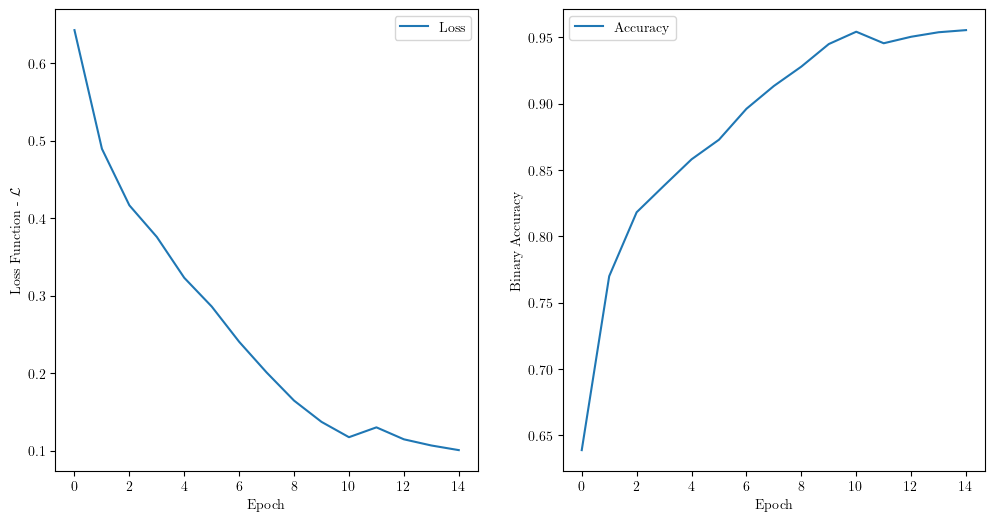

In [13]:
network=Sequential()
network.add(keras.Input(shape=(2,)))
network.add(Dense(512, activation='relu'))
network.add(Dense(256, activation='relu'))
network.add(Dense(128, activation='relu'))
network.add(Dense(64,activation = "relu"))
network.add(Dense(32,activation = "relu"))
network.add(Dense(16,activation = "relu"))
network.add(Dense(8,activation = "relu"))          #relu öğrenme içindeki adımları otomatik belirliyor
network.add(Dense(1,activation = "sigmoid"))#çıkan veriler tek sonuç olduğunda sigmoid

# Modeli derleyin
network.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy', keras.metrics.BinaryAccuracy()])
# Modelin genişletilmiş veri ile yeniden eğitilmesi (15 epoch)
history_extended = network.fit(coords_extended, labels_extended, batch_size=250, epochs=15)

# Eğitim sürecindeki kayıtların anahtarlarını inceleme
history_keys = history_extended.history.keys()
print(history_keys)

# Modelin özetini görüntüleyin
network.summary()

# Eğitim sonuçlarını görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(history_extended.history['loss'], label='Loss')
ax[1].plot(history_extended.history['binary_accuracy'], label='Accuracy')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel(r'Loss Function - $\mathcal{L}$')

#ax[0].set_ylabel('Loss Function - $\mathcal{L}$')
ax[1].set_ylabel('Binary Accuracy')
ax[0].legend()
ax[1].legend()
plt.show()

#### Calculating Model Predictions on an Extended Grid
In this section, the model was tested on an extended grid ranging from -3 to 3. Predictions were calculated for each point on this grid, and the results were recorded.

In [14]:
# Daha geniş bir grid için tahminleri hesaplama
def make_square_grid(min_val=-3, max_val=3):
    x = np.linspace(min_val, max_val, 100)
    y = x
    XX, YY = np.meshgrid(x, y, indexing='xy')

    xx = XX.flatten()
    yy = YY.flatten()
    return pd.DataFrame(data={'x': xx, 'y': yy})

larger_grid = make_square_grid(-3, 3)
predictions = network.predict(larger_grid)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step


In [15]:
# Tahminlerin tekilliklerini (unique values) kontrol etme
unique_predictions = np.unique(predictions)
unique_predictions

array([1.1354872e-19, 1.5620413e-19, 2.1467194e-19, ..., 9.9999988e-01,
       9.9999994e-01, 1.0000000e+00], dtype=float32)

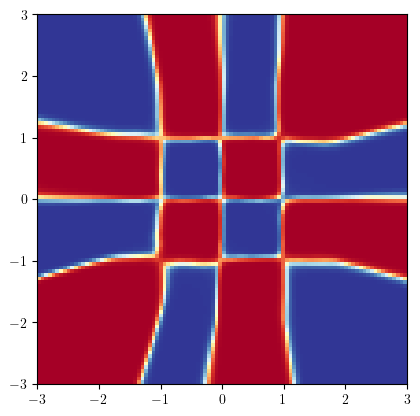

In [16]:
# Tahminlerin ısı haritası ile görselleştirilmesi
grid_vals2 = predictions.reshape((100, 100))
plt.imshow(grid_vals2, cmap='RdYlBu', extent=(-3, 3, -3, 3))
plt.show()

In [17]:
# Belirli girişler için tahminler yapma
lol = network.predict(np.array([[0.5, 0.5], [-0.5, 0.5]]))
lol

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[9.9964315e-01],
       [1.5837857e-06]], dtype=float32)

In [18]:
# Görmediği verilerle performans testi için unseen_data yükleme
unseen_data = pd.read_csv('./data/unseen_test.csv')
unseen_coords = unseen_data.drop('category', axis=1)
unseen_labels = unseen_data['category']

# unseen_data üzerinde tahminlerin yapılması
new_pred = network.predict(unseen_coords)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


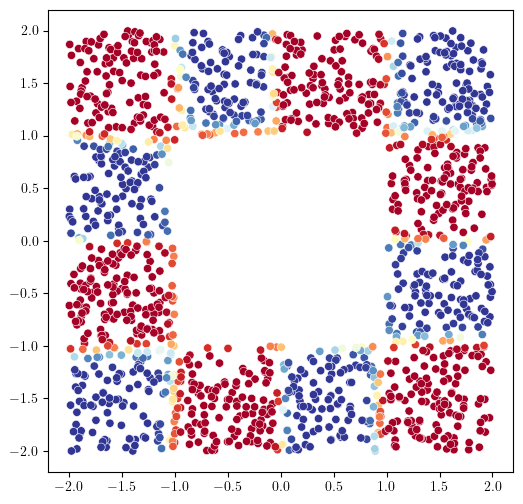

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step


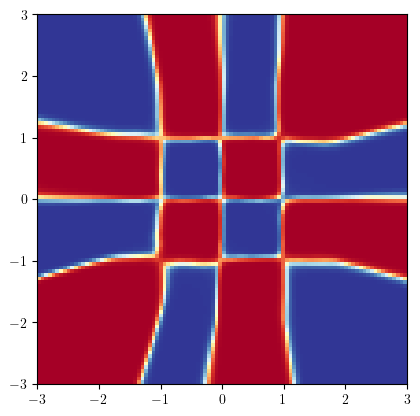

In [19]:
# Tahminlerin scatter plot ile görselleştirilmesi
fig2, ax2 = plt.subplots(figsize=(6,6))
plt.scatter(unseen_coords['x'], unseen_coords['y'], c=new_pred, ec='w', lw=0.4, cmap='RdYlBu')
plt.show()

# Geniş grid üzerinde yeni tahminlerin görselleştirilmesi
new_prediction = network.predict(make_square_grid(-3, 3)).reshape((100, 100))
plt.imshow(new_prediction, cmap='RdYlBu', extent=(-3, 3, -3, 3))
plt.show()

In this study, I built a neural network model with multiple layers and a relatively high number of neurons, and trained it on the extended_training.csv dataset. I trained the model for 15 epochs and observed that the loss function decreased rapidly while the accuracy reached 96%.

The model was able to classify the data successfully by making predictions over a wide grid range. Additionally, it was observed that the model could distinguish the data quite accurately when making predictions on the unseen_test.csv dataset.

This study demonstrates that a deep and multi-layered model is highly effective in learning the data and making predictions with high accuracy on unseen data.



+ Additional Features: To classify stars, additional information like temperature, spectral type, luminosity, and surface gravity can be used. This can improve the accuracy of the classification.

+ Advantages of ReLU: ReLU works faster and more efficiently compared to the sigmoid function. Additionally, advanced versions like Leaky ReLU and Parametric ReLU can further enhance performance in some cases.

+ Suitability of Machine Learning: Machine learning is a good solution for complex problems like this. However, even better results can be achieved when combined with physical models.